<a href="https://colab.research.google.com/github/callumeppz/ParalelComputingCW/blob/main/FinalDoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [120]:
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [121]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [122]:
!pip install -q findspark

In [123]:
import os

In [124]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [125]:
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [126]:
import findspark
findspark.init()

In [127]:
from pyspark import SparkContext, SparkConf
import random
import matplotlib.pyplot as plt
import sys
import numpy as np


Enter the number of darts: 1000
Enter the number of partitions: 32
Estimated Pi: 3.144


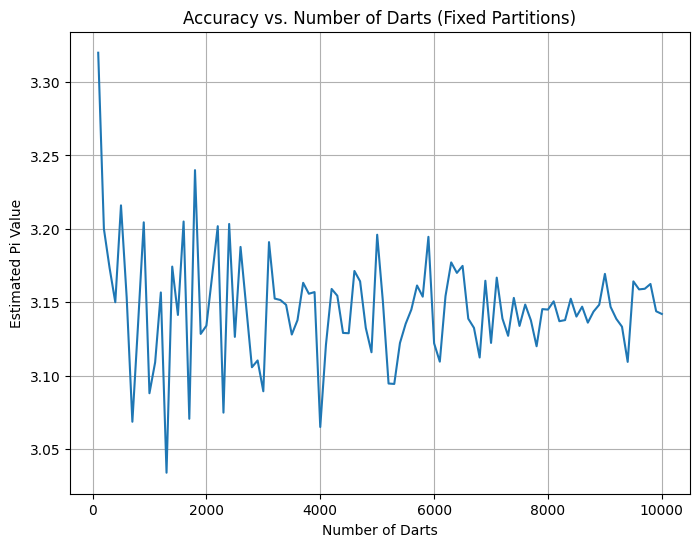

In [128]:
# setting up Spark and Spark context
conf = SparkConf().setAppName('PiTrial')
sc = SparkContext()

def sample(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1 # random points

# function to estimate pi using Monte Carlo
def estimate_pi(num_samples, num_partitions):
    count = sc.parallelize(range(0, num_samples), num_partitions) \
             .filter(sample).count()

    return 4.0 * count / num_samples # return pi

# Part (A) - estimating pi with a input set of darts and partitions
num_samples = int(input("Enter the number of darts: ")) #Input samples
num_partitions = int(input("Enter the number of partitions: ")) #Input partitions
estimated_pi = estimate_pi(num_samples, num_partitions)
print("Estimated Pi:", estimated_pi) # pritning pi

# Part (B) - producing a figure of Accuracy vs Number of darts
num_partitions = 32 # setting partition count
num_samples_for_plot = np.arange(100, 10000 + 1, 100) # setting sample count array, np.arrange to go through

# Estimate Pi for num_samples_for_plot
pi_estimates = [estimate_pi(samples, num_partitions) for samples in num_samples_for_plot] # call estimate_pi function

# Plotting the graph
plt.figure(figsize=(8, 6)) # graph size
plt.plot(num_samples_for_plot, pi_estimates)
plt.title('Accuracy vs. Number of Darts (Fixed Partitions)')
plt.xlabel('Number of Darts')
plt.ylabel('Estimated Pi Value')
plt.grid(True)
plt.show()

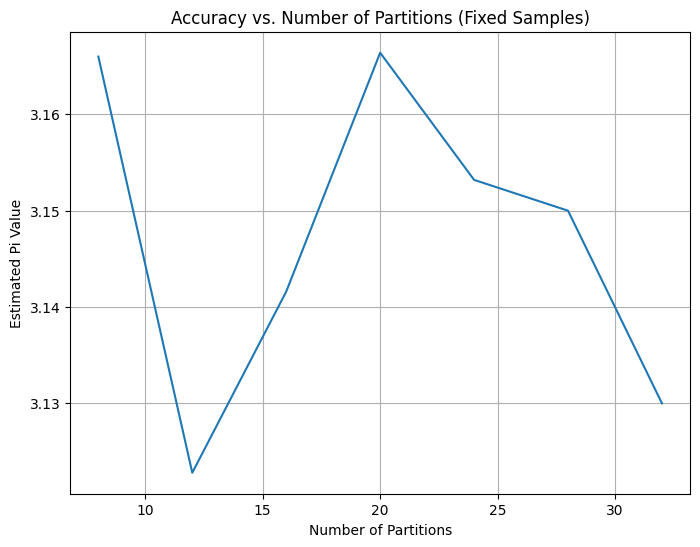

In [129]:
# Function to estimate pi using Monte Carlo# Part (C) - Producing a figure of Accuracy vs Number of partitions
partition_count = (8, 12, 16, 20, 24, 28, 32)
sample_counts = 10000

# Estimate Pi for partition_count
pi_estimates_part = [estimate_pi(sample_counts, partitions) for partitions in partition_count]# call estimate_pi function

# Plotting the graph
plt.figure(figsize=(8, 6)) # graph size
plt.plot(partition_count, pi_estimates_part)
plt.title('Accuracy vs. Number of Partitions (Fixed Samples)')
plt.xlabel('Number of Partitions')
plt.ylabel('Estimated Pi Value')
plt.grid(True)
plt.show()

# Stopping Spark context
sc.stop()